# **Mount Drive**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


# **Read Dataset: .csv/.xlsx to DataFrame**

In [ ]:
merged_df = pd.read_csv("merged_data.csv")

<ipython-input-28-778280024b49>:1: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("merged_data.csv")


In [ ]:


df = pd.read_csv("merged_data.csv")

print(len(df))


7260


<ipython-input-29-ff6aabc2ee4c>:1: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data.csv")


# **Dataset Analysis**

- shape
- columns
- head()
- sample()
- describe()
- finding categorical features
- checking if any null/nan values
- filtering data instances based on indices
- filtering data instances based on conditional statements


In [ ]:
merged_df.shape


(7260, 145)

In [ ]:
#Null values before Pre processingi


df = pd.read_csv("merged_data.csv")


null_counts = df.isnull().sum()

for column, null_count in null_counts.items():
    print(f"The number of null values in {column} is {null_count}")

null_sum = df.isnull().sum().sum()


print(f"The sum of all null values is {null_sum}")

<ipython-input-31-501fa25cc570>:4: DtypeWarning: Columns (83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_data.csv")


The number of null values in Unnamed: 0 is 0
The number of null values in Div is 0
The number of null values in Date is 0
The number of null values in HomeTeam is 0
The number of null values in AwayTeam is 0
The number of null values in FTHG is 0
The number of null values in FTAG is 0
The number of null values in FTR is 0
The number of null values in HTHG is 0
The number of null values in HTAG is 0
The number of null values in HTR is 0
The number of null values in Attendance is 6501
The number of null values in Referee is 0
The number of null values in HS is 0
The number of null values in AS is 0
The number of null values in HST is 0
The number of null values in AST is 0
The number of null values in HHW is 6500
The number of null values in AHW is 6500
The number of null values in HC is 0
The number of null values in AC is 0
The number of null values in HF is 0
The number of null values in AF is 0
The number of null values in HO is 6500
The number of null values in AO is 6500
The number

In [ ]:
merged_df.columns


Index(['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=145)

In [ ]:
merged_df.head(10)



,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,E0,19/08/00,Leicester,Aston Villa,0,0,D,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,E0,19/08/00,Liverpool,Bradford,1,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,E0,19/08/00,Sunderland,Arsenal,1,0,H,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,E0,19/08/00,Tottenham,Ipswich,3,1,H,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,E0,20/08/00,Man United,Newcastle,2,0,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.isnull().sum()

Unnamed: 0       0
Div              0
Date             0
HomeTeam         0
AwayTeam         0
              ... 
PCAHA         7000
MaxCAHH       7000
MaxCAHA       7000
AvgCAHH       7000
AvgCAHA       7000
Length: 145, dtype: int64

In [ ]:
merged_df.sample(5)


,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
2055,155,E0,12/12/05,Tottenham,Portsmouth,3,1,H,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7096,96,E0,27/10/2019,Newcastle,Wolves,1,1,D,1,0,...,1.55,0.25,1.89,2.04,1.89,2.05,1.9,2.25,1.86,2.03
5240,300,E0,23/03/14,Tottenham,Southampton,3,2,H,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1565,45,E0,11/09/04,Newcastle,Blackburn,3,0,H,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3165,125,E0,15/11/08,West Brom,Chelsea,0,3,A,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.describe()

,Unnamed: 0,FTHG,FTAG,HTHG,HTAG,Attendance,HS,AS,HST,AST,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,759.000000,7260.000000,7260.000000,7260.000000,7260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,184.926997,1.525758,1.138705,0.681543,0.497521,33718.504611,13.520110,10.543113,6.328788,4.879890,...,2.232500,-0.302885,1.943538,1.965308,1.959885,1.976731,2.015308,2.031192,1.934923,1.954231
std,109.371819,1.294503,1.128066,0.829751,0.713454,12108.931821,5.211521,4.505855,3.360881,2.830649,...,0.537829,0.976975,0.143365,0.105926,0.157621,0.109652,0.156045,0.115118,0.142163,0.102952
min,0.000000,0.000000,0.000000,0.000000,0.000000,14651.000000,0.000000,0.000000,0.000000,0.000000,...,1.460000,-3.250000,1.670000,1.270000,1.710000,1.300000,1.800000,1.300000,1.700000,1.280000
25%,90.000000,1.000000,0.000000,0.000000,0.000000,24707.000000,10.000000,7.000000,4.000000,3.000000,...,1.847500,-0.750000,1.867500,1.900000,1.880000,1.890000,1.930000,1.950000,1.850000,1.880000
50%,182.000000,1.000000,1.000000,0.000000,0.000000,32910.000000,13.000000,10.000000,6.000000,4.000000,...,2.140000,-0.250000,1.945000,1.975000,1.955000,1.980000,2.000000,2.040000,1.925000,1.955000
75%,279.000000,2.000000,2.000000,1.000000,1.000000,39834.000000,17.000000,13.000000,8.000000,7.000000,...,2.450000,0.250000,2.020000,2.042500,2.032500,2.050000,2.070000,2.112500,2.000000,2.030000
max,379.000000,9.000000,9.000000,5.000000,5.000000,67683.000000,43.000000,30.000000,24.000000,20.000000,...,5.010000,3.000000,3.550000,2.200000,3.930000,2.290000,3.950000,2.300000,3.660000,2.240000


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Columns: 145 entries, Unnamed: 0 to AvgCAHA
dtypes: float64(120), int64(17), object(8)
memory usage: 8.0+ MB


# **Dataset Visualization**

- Dataset biased or not
- Histogram
- Scatter Plot
- Bar chart
- etc.

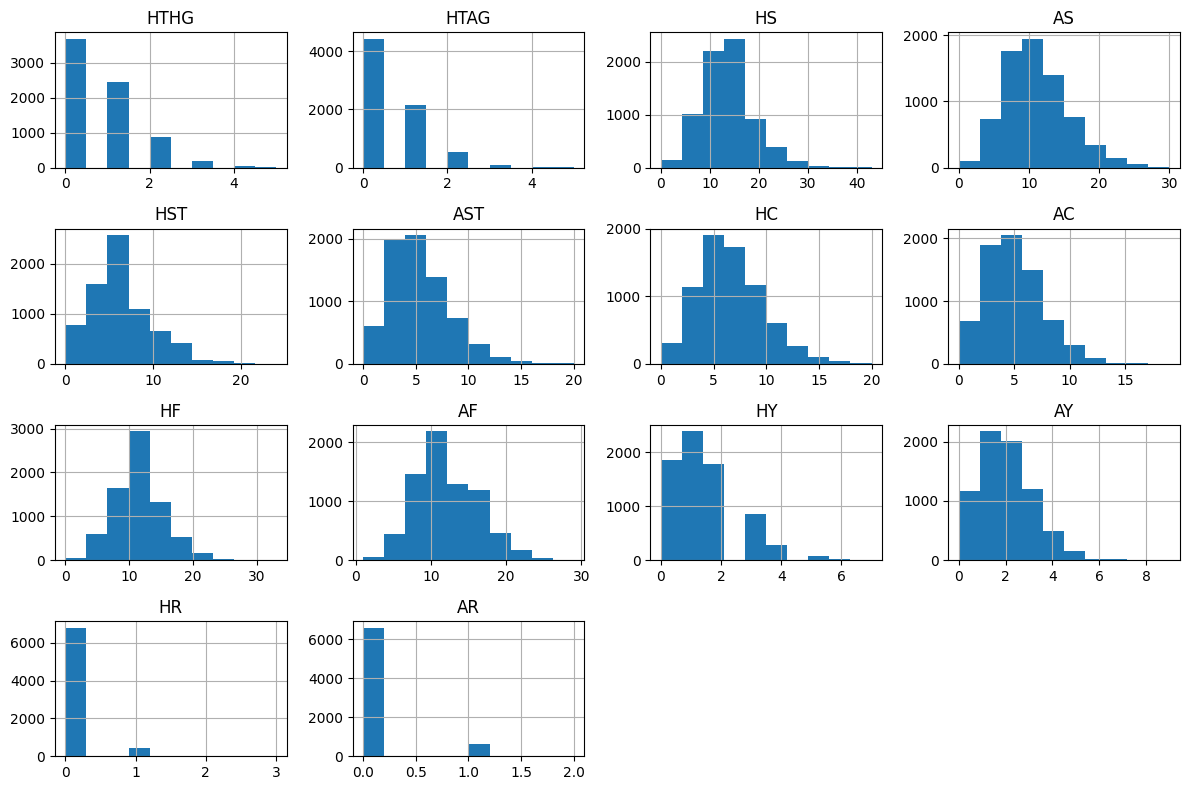

In [ ]:
features_set = ['HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR']
selected_features = merged_df[features_set]


selected_features.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

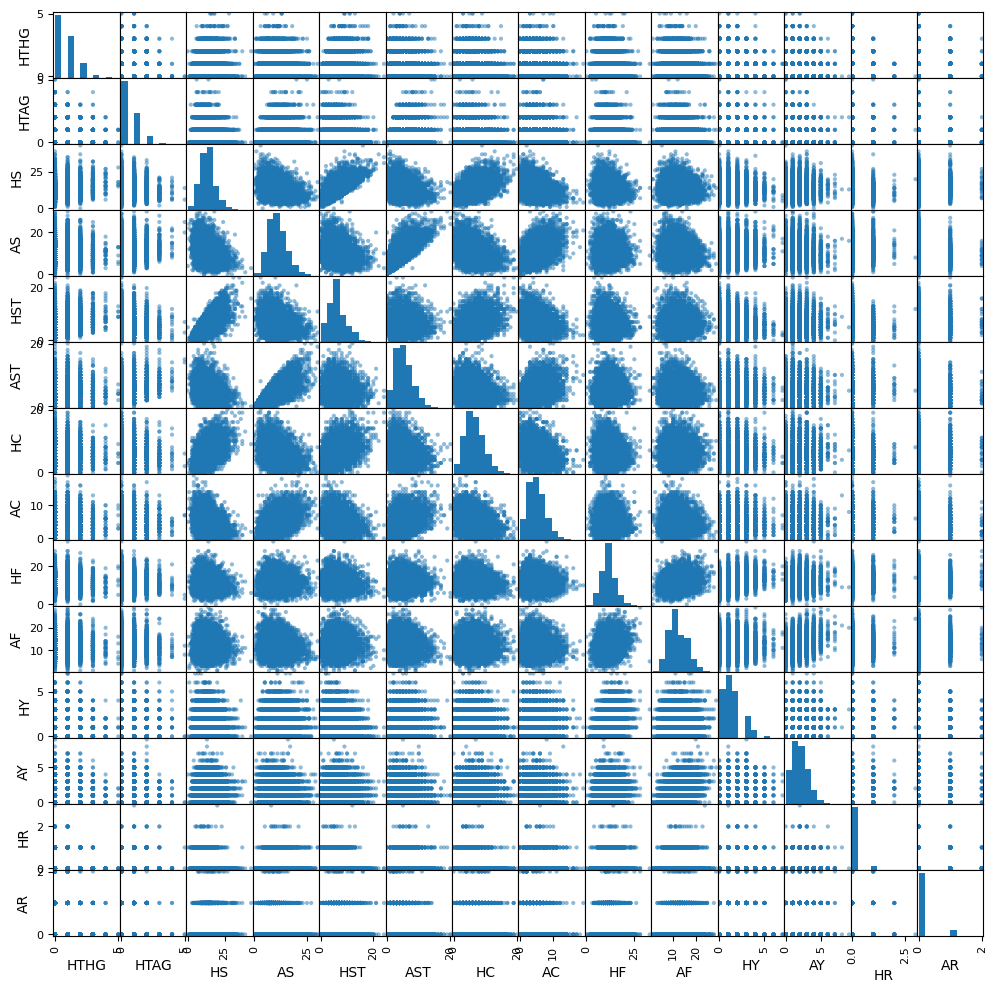

In [ ]:
selected_features = merged_df[features_set]
pd.plotting.scatter_matrix(selected_features, alpha=0.5, figsize=(12, 12))
plt.show()


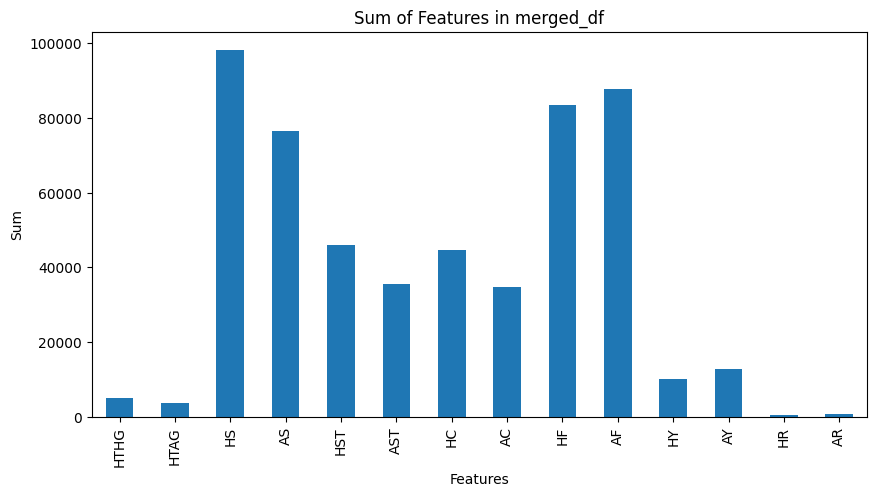

In [ ]:
selected_features = merged_df[features_set]


sums = selected_features.sum()


fig, ax = plt.subplots(figsize=(10, 5))
sums.plot(kind='bar', ax=ax)
ax.set_title("Sum of Features in merged_df")
ax.set_xlabel("Features")
ax.set_ylabel("Sum")
plt.show()

# **Dataset Pre-processing**

- Null/NaN values handling

    a) Delete Rows

    b) Delete Columns

    c) Impute Values

- Encoding Categorical Features

- Feature Scaling

In [ ]:
list_of_features = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
                    'HTHG', 'HTAG', 'HTR', ]

# Impute
categorical_imputer = SimpleImputer(strategy='most_frequent')
merged_df[list_of_features] = categorical_imputer.fit_transform(merged_df[list_of_features])
numerical_imputer = SimpleImputer(strategy='median')
numerical_features = ['BSH', 'B365H', 'B365A', 'BWH', 'BWD', 'BWA', 'AST']
merged_df[numerical_features] = numerical_imputer.fit_transform(merged_df[numerical_features])


prev_match_results = {}


for index, row in merged_df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ftr = row['FTR']

    # Initialize lists for home and away teams if not present in the dictionary
    if home_team not in prev_match_results:
        prev_match_results[home_team] = []
    if away_team not in prev_match_results:
        prev_match_results[away_team] = []

    #all matches
    prev_match_results[home_team].append(ftr)
    prev_match_results[away_team].append(ftr)

    #5 matches
    prev_match_results[home_team] = prev_match_results[home_team][-5:]
    prev_match_results[away_team] = prev_match_results[away_team][-5:]

#new column
merged_df['HomeTeam_PrevMatches'] = merged_df['HomeTeam'].apply(lambda team: prev_match_results[team])
merged_df['AwayTeam_PrevMatches'] = merged_df['AwayTeam'].apply(lambda team: prev_match_results[team])


enc = LabelEncoder()
merged_df['result_enc'] = enc.fit_transform(merged_df['FTR'])
merged_df['opponent_enc'] = enc.fit_transform(merged_df['HomeTeam'])
merged_df['HTHG_enc'] = enc.fit_transform(merged_df['HTHG'])
merged_df['HTAG_enc'] = enc.fit_transform(merged_df['HTAG'])
merged_df['FTHG_enc'] = enc.fit_transform(merged_df['FTHG'])
merged_df['htr_enc'] = enc.fit_transform(merged_df['HTR'])
merged_df['HomeTeam_enc'] = enc.fit_transform(merged_df['HomeTeam'])
merged_df['AwayTeam_enc'] = enc.fit_transform(merged_df['AwayTeam'])
merged_df['HTHG_enc'] = enc.fit_transform(merged_df['HTHG'])
merged_df['HTAG_enc'] = enc.fit_transform(merged_df['HTAG'])
merged_df['HTR_enc'] = enc.fit_transform(merged_df['HTR'])

merged_df['HST'] = merged_df['HST'].astype(int)
merged_df['HS'] = merged_df['HS'].astype(int)

merged_df['HST']+= 1
merged_df['HS'] += 1

merged_df['xgH_raw'] = merged_df['HST']/ merged_df['HS']
merged_df['xgH']= merged_df['FTHG']-(merged_df['HST']/ merged_df['HS'])


merged_df['AST'] = merged_df['HST'].astype(int)
merged_df['AS'] = merged_df['HS'].astype(int)
merged_df['AST']+= 1
merged_df['AS'] += 1
merged_df['xga_raw'] = merged_df['AST']/ merged_df['AS']



column_data = merged_df['HomeTeam_PrevMatches']

merged_df['HomeTeam_PrevMatches_Encoded'] = None

#3xt Hometeam win
mapping = {'A': -1, 'H': 1, 'D': 0}
merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches'].apply(lambda x: [mapping.get(item, item) for item in x])
merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches_Encoded'].apply(lambda x: [idx*val for idx, val in enumerate(x, start=1)])

#Mean

merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches_Encoded'].apply(lambda x: np.mean(x))
#3xt Awayteam win
mapping = {'A': 1, 'H': -1, 'D': 0}
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches'].apply(lambda x: [mapping.get(item, item) for item in x])
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches_Encoded'].apply(lambda x: [idx*val for idx, val in enumerate(x, start=1)])
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches_Encoded'].apply(lambda x: np.mean(x))



column_data = merged_df['HomeTeam_PrevMatches']



# Convert all NaN values to 1
merged_df.fillna(0, inplace=True)

features_list = [
    "FTHG", "FTAG", "HTHG", "HTAG", "Attendance",
    "HS", "AS", "HST", "AST", "HHW", "AHW", "HC", "AC", "HF", "AF", "HO",
    "AO", "HY", "AY", "HR", "AR", "B365H", "B365D", "B365A", "BWH", "BWD",
    "BWA", "GBH", "GBD", "GBA", "IWH", "IWD", "IWA", "LBH", "LBD", "LBA",
    "SBH", "SBD", "SBA", "WHH", "WHD", "WHA", "SJH", "SJD", "SJA", "VCH",
    "VCD", "VCA", "BSH", "BSD", "BSA", "Bb1X2", "BbMxH", "BbAvH", "BbMxD",
    "BbAvD", "BbMxA", "BbAvA", "BbOU", "BbMx>2.5", "BbAv>2.5", "BbMx<2.5",
    "BbAv<2.5", "BbAH", "BbAHh", "BbMxAHH", "BbAvAHH", "BbMxAHA", "BbAvAHA",
    "PSH", "PSD", "PSA", "PSCH", "PSCD", "PSCA", "MaxH", "MaxD",
    "MaxA", "AvgH", "AvgD", "AvgA", "B365>2.5", "B365<2.5", "P>2.5", "P<2.5",
    "Max>2.5", "Max<2.5", "Avg>2.5", "Avg<2.5", "AHh", "B365AHH", "B365AHA",
    "PAHH", "PAHA", "MaxAHH", "MaxAHA", "AvgAHH", "AvgAHA", "B365CH", "B365CD",
    "B365CA", "BWCH", "BWCD", "BWCA", "IWCH", "IWCD", "IWCA", "WHCH", "WHCD",
    "WHCA", "VCCH", "VCCD", "VCCA", "MaxCH", "MaxCD", "MaxCA", "AvgCH", "AvgCD",
    "AvgCA", "B365C>2.5", "B365C<2.5", "PC>2.5", "PC<2.5", "MaxC>2.5",
    "MaxC<2.5", "AvgC>2.5", "AvgC<2.5", "AHCh", "B365CAHH", "B365CAHA",
    "PCAHH", "PCAHA", "MaxCAHH", "MaxCAHA", "AvgCAHH", "AvgCAHA",
    "opponent_enc", "HTHG_enc", "HTAG_enc", "htr_enc", "HomeTeam_enc",
    "AwayTeam_enc", "HTR_enc", "xgH_raw", "xga_raw",
    "HomeTeam_PrevMatches_Encoded", "AwayTeam_PrevMatches_Encoded"
]
main_main_pd = [ 'FTHG_enc','HTAG_enc', 'htr_enc', 'HTR_enc', 'PSH', 'xga_raw', 'xgH_raw', 'AwayTeam_PrevMatches_Encoded',
                'AwayTeam_enc', 'B365A', 'PSD', 'BWD', 'BbAvH', 'BbAvA', 'BbOU', 'HomeTeam_enc', 'BbAv<2.5', 'BWA', 'HomeTeam_PrevMatches_Encoded', 'BbAvH', 'BbMxA', 'GBA',
                'IWH', 'opponent_enc', 'BbMx<2.5', 'BSH', 'IWH', 'IWA', 'BbAvD', 'HTHG_enc', 'BWH', 'LBA', 'GBA', 'BWH', 'GBH', 'B365H', 'BWH', 'IWD',
                'B365H', 'LBH', 'BbMxD', 'GBD', 'LBD']

columns_to_drop = ['Div']
for i in features_list:
  if i not in main_main_pd:
    columns_to_drop.append(i)


# Drop the specified columns
merged_df.drop(columns=columns_to_drop, inplace=True)


print(len(main_main_pd))

merged_df

43


,Unnamed: 0,Date,HomeTeam,AwayTeam,FTR,HTR,Referee,B365H,B365A,BWH,...,FTHG_enc,htr_enc,HomeTeam_enc,AwayTeam_enc,HTR_enc,xgH_raw,xgH,xga_raw,HomeTeam_PrevMatches_Encoded,AwayTeam_PrevMatches_Encoded
0,0,19/08/00,Charlton,Man City,H,H,Rob Harris,2.20,3.50,2.15,...,4,2,11,24,2,0.833333,3.166667,0.842105,0.0,-1.0
1,1,19/08/00,Chelsea,West Ham,H,H,Graham Barber,2.20,3.50,2.15,...,4,2,12,41,2,0.611111,3.388889,0.631579,-0.4,-0.8
2,2,19/08/00,Coventry,Middlesbrough,A,D,Barry Knight,2.20,3.50,2.15,...,1,1,13,27,1,0.571429,0.428571,0.625000,0.8,-1.0
3,3,19/08/00,Derby,Southampton,D,A,Andy D'Urso,2.20,3.50,2.15,...,2,0,15,34,0,0.714286,1.285714,0.750000,-0.6,1.4
4,4,19/08/00,Leeds,Everton,H,H,Dermot Gallagher,2.20,3.50,2.15,...,2,2,21,16,2,0.500000,1.500000,0.526316,1.4,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,255,15/02/2020,Norwich,Liverpool,A,D,S Attwell,11.00,1.25,9.75,...,0,1,29,23,1,0.333333,-0.333333,0.428571,0.2,1.0
7256,256,16/02/2020,Aston Villa,Tottenham,A,A,M Atkinson,4.00,1.85,4.00,...,2,0,1,38,0,0.263158,1.736842,0.300000,0.2,-0.2
7257,257,16/02/2020,Arsenal,Newcastle,H,D,L Mason,1.40,8.00,1.40,...,4,1,0,28,1,0.500000,3.500000,0.529412,1.0,-1.4
7258,258,17/02/2020,Chelsea,Man United,A,A,A Taylor,1.85,4.50,1.87,...,0,0,12,25,0,0.111111,-0.111111,0.157895,-0.4,1.0


# **Feature Selection**

In [ ]:

gb_classifier = GradientBoostingClassifier(random_state=50)
train_set, test_set = train_test_split(merged_df, test_size=0.2, random_state=1024)

gb_classifier.fit(train_set[main_main_pd], train_set["result_enc"])

# Calculate the correlation matrix
correlation_matrix = train_set[main_main_pd + ["result_enc"]].corr()

plt.figure(figsize=(150, 180))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
importance = gb_classifier.feature_importances_

features = train_set[main_main_pd].columns

feature_importance = pd.DataFrame({"Feature": features, "Importance": importance})
feature_importance.sort_values("Importance", ascending=False, inplace=True)

important_columns = feature_importance["Feature"].tolist()
importantance= feature_importance["Importance"].tolist()

important_columns = [x for x,y in zip(important_columns,importantance) if y > 0]
print(important_columns)

['FTHG_enc', 'HTAG_enc', 'HTR_enc', 'htr_enc', 'PSH', 'xga_raw', 'xgH_raw', 'AwayTeam_PrevMatches_Encoded', 'AwayTeam_enc', 'B365A', 'PSD', 'BWA', 'BbAvH', 'BWD', 'opponent_enc', 'BbOU', 'BbAvA', 'HomeTeam_PrevMatches_Encoded', 'BbAv<2.5', 'BbAvH', 'IWH', 'GBH', 'BbMx<2.5', 'GBA', 'BbMxA', 'HTHG_enc', 'BSH', 'HomeTeam_enc', 'IWH', 'GBA', 'IWD', 'BWH', 'BbAvD', 'B365H', 'LBA', 'IWA', 'LBH', 'BWH', 'BWH', 'BbMxD', 'GBD', 'B365H', 'LBD']


# **Dataset Splitting**

- Training Set

- Testing Set

In [ ]:
rain_set, test_set = train_test_split(mertged_df, test_size=0.2, random_state=1024)


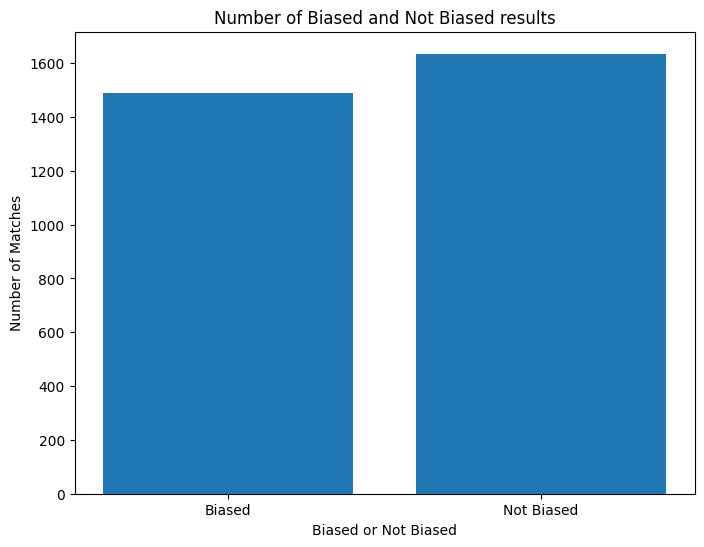

In [ ]:
# Create a bar chart of the number of biased and not biased articles
plt.figure(figsize=(8, 6))
plt.bar(["Biased", "Not Biased"], [len(train_set[train_set["result_enc"] == 1]), len(train_set[train_set["result_enc"] == 0])])
plt.xlabel("Biased or Not Biased")
plt.ylabel("Number of Matches")
plt.title("Number of Biased and Not Biased results")
plt.show()

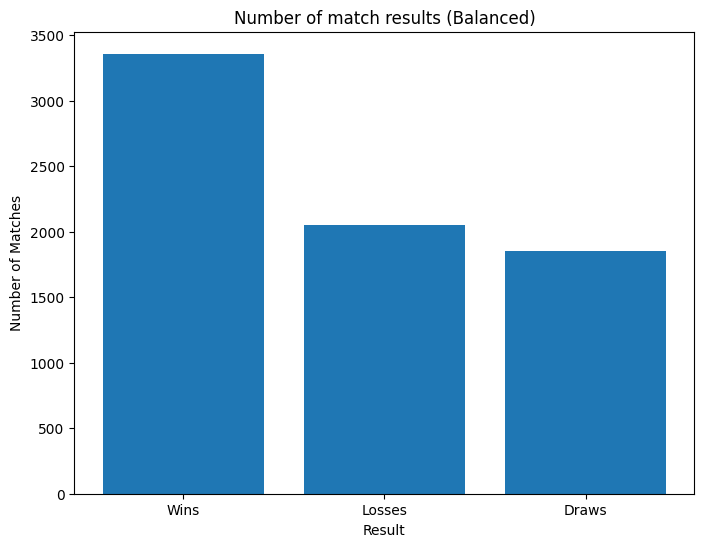

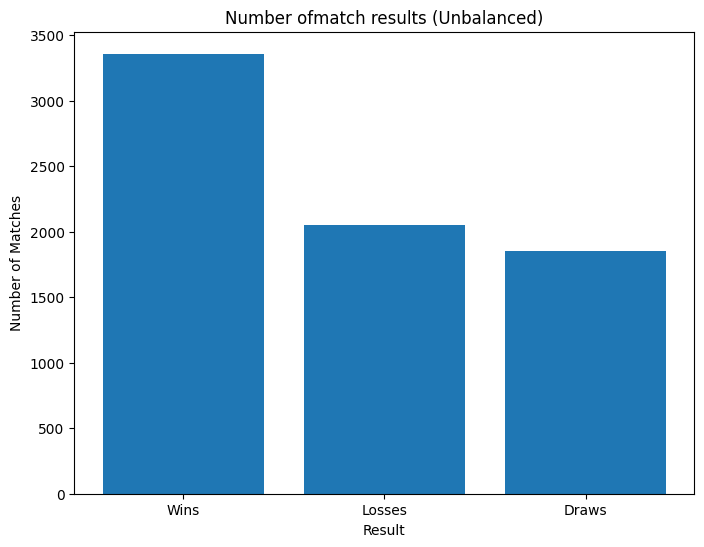

In [ ]:
def plot_bar_chart(df, title):


    plt.figure(figsize=(8, 6))
    plt.bar(["Wins", "Losses", "Draws"], [len(merged_df[merged_df["result_enc"] == 2]), len(merged_df[merged_df["result_enc"] == 0]), len(merged_df[merged_df["result_enc"] == 1])])
    plt.xlabel("Result")
    plt.ylabel("Number of Matches")
    plt.title(title)
    plt.show()


balanced_df = df.sample(frac=1, random_state=1024)


plot_bar_chart(balanced_df, "Number of match results (Balanced)")


unbalanced_df = df.sample(frac=0.5, random_state=1024)


plot_bar_chart(unbalanced_df, "Number ofmatch results (Unbalanced)")

# **Dataset Training**

Classification Problem

- SVM

- Decision Tree

- K-nearest Neighbors

- Logistic Regression

Regression Problem
- https://www.upgrad.com/blog/types-of-regression-models-in-machine-learning/

SVM - Accuracy: 0.6707988980716253
SVM - Recall: 0.6707988980716253
SVM - Precision: 0.6707988980716253
SVM - F1 score: 0.6707988980716253


DecisionTreeClassifier - Accuracy: 0.7011019283746557
DecisionTreeClassifier - Recall: 0.7011019283746557
DecisionTreeClassifier - Precision: 0.7011019283746557
DecisionTreeClassifier - F1 score: 0.7011019283746557


KNeighborsClassifier - Accuracy: 0.5867768595041323
KNeighborsClassifier - Recall: 0.5867768595041323
KNeighborsClassifier - Precision: 0.5867768595041323
KNeighborsClassifier - F1 score: 0.5867768595041323


LogisticRegression - Accuracy: 0.7258953168044077
LogisticRegression - Recall: 0.7258953168044077
LogisticRegression - Precision: 0.7258953168044077
LogisticRegression - F1 score: 0.7258953168044077




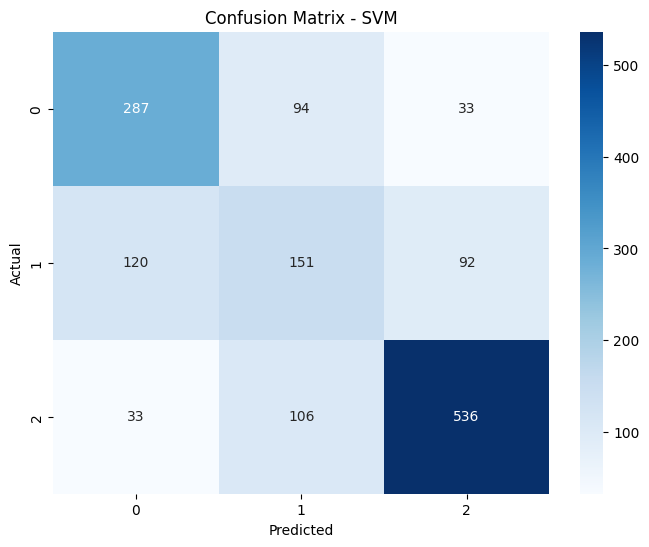

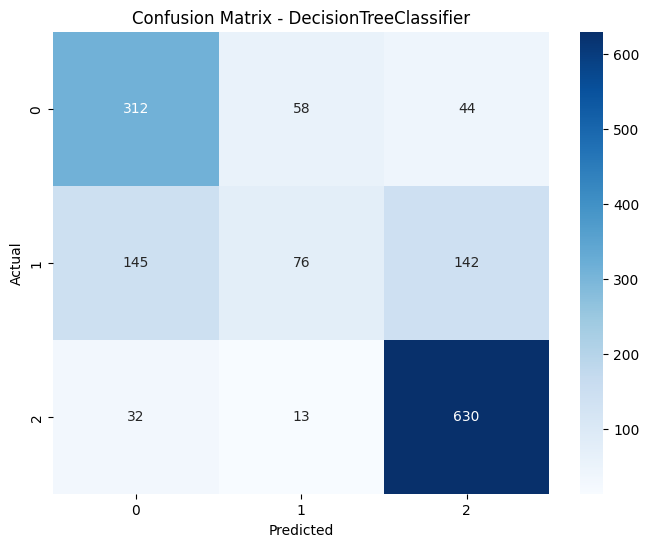

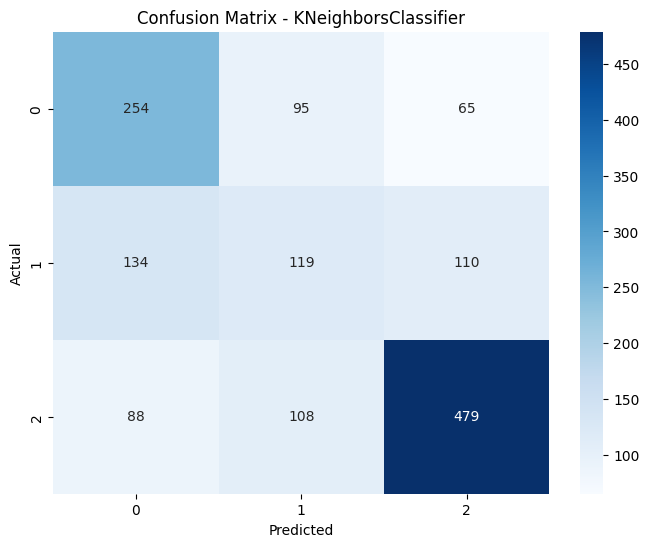

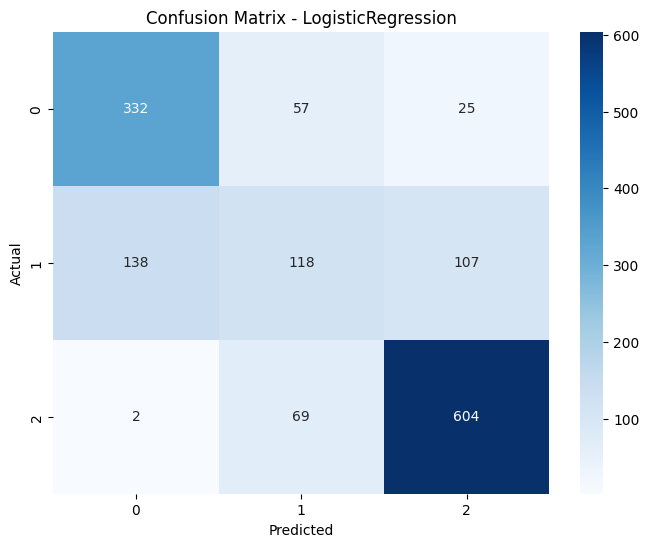

In [ ]:
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score




svc_classifier = SVC(random_state=50)


dt_classifier = DecisionTreeClassifier(random_state=50)


knn_classifier = KNeighborsClassifier()

lr_classifier = LogisticRegression(random_state=50,max_iter=100000)
# List of classifiers
classifiers = [dt_classifier, svc_classifier,knn_classifier, lr_classifier]
classifier_names = ["SVM", "DecisionTreeClassifier", 'KNeighborsClassifier','LogisticRegression']


for clf, clf_name in zip(classifiers, classifier_names):

    clf.fit(train_set[main_main_pd], train_set["result_enc"])


    predictions = clf.predict(test_set[main_main_pd])


    accuracy = accuracy_score(predictions, test_set["result_enc"])
    print(f"{clf_name} - Accuracy:", accuracy)


    recall = recall_score(test_set["result_enc"], predictions, average="micro")
    print(f"{clf_name} - Recall:", recall)


    precision = precision_score(test_set["result_enc"], predictions, average="micro")
    print(f"{clf_name} - Precision:", precision)


    f1 = f1_score(test_set["result_enc"], predictions, average="micro")
    print(f"{clf_name} - F1 score:", f1)
    print("\n")


for clf, clf_name in zip(classifiers, classifier_names):

    clf.fit(train_set[main_main_pd], train_set["result_enc"])


    predictions = clf.predict(test_set[main_main_pd])




    cm = confusion_matrix(test_set["result_enc"], predictions)


    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("\n")


Random Forest - Accuracy: 0.7444903581267218
Random Forest - Recall: 0.7444903581267218
Random Forest - Precision: 0.7444903581267218
Random Forest - F1 score: 0.7444903581267218


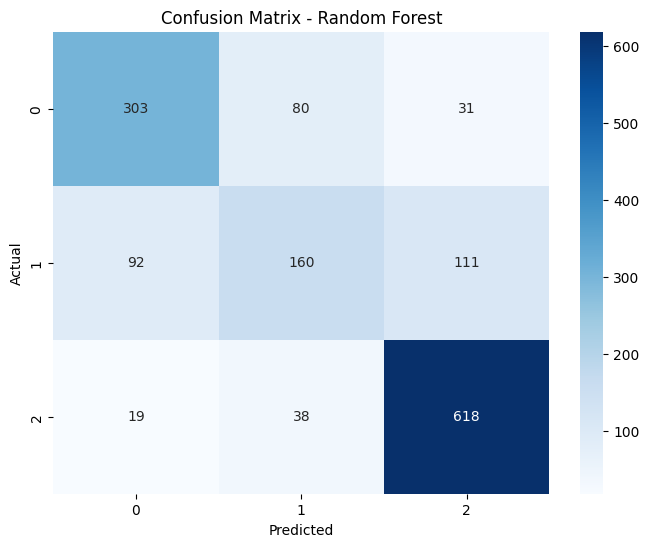

In [ ]:
rf_classifier = RandomForestClassifier(random_state=50)


rf_classifier.fit(train_set[main_main_pd], train_set["result_enc"])


predictions = rf_classifier.predict(test_set[main_main_pd])


accuracy = accuracy_score(predictions, test_set["result_enc"])
print(f"Random Forest - Accuracy:", accuracy)


recall = recall_score(test_set["result_enc"], predictions, average="micro")
print(f"Random Forest - Recall:", recall)


precision = precision_score(test_set["result_enc"], predictions, average="micro")
print(f"Random Forest - Precision:", precision)


f1 = f1_score(test_set["result_enc"], predictions, average="micro")
print(f"Random Forest - F1 score:", f1)


cm = confusion_matrix(test_set["result_enc"], predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Dataset Testing with the unseen x_data**

In [ ]:

gb_classifier = GradientBoostingClassifier(random_state=50)
gb_classifier.fit(train_set[main_main_pd], train_set["result_enc"])
predictions = gb_classifier.predict(test_set[main_main_pd])


accuracy = accuracy_score(predictions, test_set["result_enc"])
print("Accuracy:", accuracy)


recall = recall_score(test_set["result_enc"], predictions, average="micro")
print("Recall:", recall)


precision = precision_score(test_set["result_enc"], predictions, average="micro")
print("Precision:", precision)

f1 = f1_score(test_set["result_enc"], predictions, average="micro")
print("F1 score:", f1)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_set["result_enc"], predictions)

print("Confusion Matrix:")
print(cm)


Accuracy: 0.7541322314049587
Recall: 0.7541322314049587
Precision: 0.7541322314049587
F1 score: 0.7541322314049587
Confusion Matrix:
[[289  83  42]
 [ 76 146 141]
 [  2  13 660]]


In [ ]:
unseen_pd = pd.read_csv("2019-20.csv")

merged_df = unseen_pd



prev_match_results = {}


for index, row in merged_df.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    ftr = row['FTR']

    # Initialize lists for home and away teams if not present in the dictionary
    if home_team not in prev_match_results:
        prev_match_results[home_team] = []
    if away_team not in prev_match_results:
        prev_match_results[away_team] = []

    #all matches
    prev_match_results[home_team].append(ftr)
    prev_match_results[away_team].append(ftr)

    #5 matches
    prev_match_results[home_team] = prev_match_results[home_team][-5:]
    prev_match_results[away_team] = prev_match_results[away_team][-5:]

#new column
merged_df['HomeTeam_PrevMatches'] = merged_df['HomeTeam'].apply(lambda team: prev_match_results[team])
merged_df['AwayTeam_PrevMatches'] = merged_df['AwayTeam'].apply(lambda team: prev_match_results[team])


enc = LabelEncoder()
merged_df['result_enc'] = enc.fit_transform(merged_df['FTR'])
merged_df['opponent_enc'] = enc.fit_transform(merged_df['HomeTeam'])
merged_df['HTHG_enc'] = enc.fit_transform(merged_df['HTHG'])
merged_df['HTAG_enc'] = enc.fit_transform(merged_df['HTAG'])
merged_df['FTHG_enc'] = enc.fit_transform(merged_df['FTHG'])
merged_df['htr_enc'] = enc.fit_transform(merged_df['HTR'])
merged_df['HomeTeam_enc'] = enc.fit_transform(merged_df['HomeTeam'])
merged_df['AwayTeam_enc'] = enc.fit_transform(merged_df['AwayTeam'])
merged_df['HTHG_enc'] = enc.fit_transform(merged_df['HTHG'])
merged_df['HTAG_enc'] = enc.fit_transform(merged_df['HTAG'])
merged_df['HTR_enc'] = enc.fit_transform(merged_df['HTR'])

merged_df['HST'] = merged_df['HST'].astype(int)
merged_df['HS'] = merged_df['HS'].astype(int)

merged_df['HST']+= 1
merged_df['HS'] += 1

merged_df['xgH_raw'] = merged_df['HST']/ merged_df['HS']
merged_df['xgH']= merged_df['FTHG']-(merged_df['HST']/ merged_df['HS'])


merged_df['AST'] = merged_df['HST'].astype(int)
merged_df['AS'] = merged_df['HS'].astype(int)
merged_df['AST']+= 1
merged_df['AS'] += 1
merged_df['xga_raw'] = merged_df['AST']/ merged_df['AS']



column_data = merged_df['HomeTeam_PrevMatches']

merged_df['HomeTeam_PrevMatches_Encoded'] = None

#3xt Hometeam win
mapping = {'A': -1, 'H': 1, 'D': 0}
merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches'].apply(lambda x: [mapping.get(item, item) for item in x])
merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches_Encoded'].apply(lambda x: [idx*val for idx, val in enumerate(x, start=1)])

#Mean

merged_df['HomeTeam_PrevMatches_Encoded'] = merged_df['HomeTeam_PrevMatches_Encoded'].apply(lambda x: np.mean(x))
#3xt Awayteam win
mapping = {'A': 1, 'H': -1, 'D': 0}
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches'].apply(lambda x: [mapping.get(item, item) for item in x])
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches_Encoded'].apply(lambda x: [idx*val for idx, val in enumerate(x, start=1)])
merged_df['AwayTeam_PrevMatches_Encoded'] = merged_df['AwayTeam_PrevMatches_Encoded'].apply(lambda x: np.mean(x))



column_data = merged_df['HomeTeam_PrevMatches']


main_main_pd = [ 'FTHG_enc','HTAG_enc', 'htr_enc', 'HTR_enc', 'PSH', 'xga_raw', 'xgH_raw', 'AwayTeam_PrevMatches_Encoded',
                'AwayTeam_enc', 'B365A', 'PSD', 'BWD', 'BbAvH', 'BbAvA', 'HomeTeam_enc', 'BbAv<2.5', 'BWA', 'HomeTeam_PrevMatches_Encoded', 'BbAvH', 'BbMxA', 'GBA',
                'IWH', 'opponent_enc', 'BbMx<2.5', 'BSH', 'IWH', 'IWA', 'HTHG_enc', 'BWH', 'LBA', 'GBA', 'BWH', 'GBH', 'BWH', 'IWD',
                'B365H', 'LBH', 'BbMxD', 'GBD', 'LBD']
# Convert all NaN values to 1
merged_df.fillna(0, inplace=True)

# **Result analysis of used models**

In [ ]:
gb_classifier = GradientBoostingClassifier(random_state=50)
gb_classifier.fit(train_set[main_main_pd], train_set["result_enc"])
predictions = gb_classifier.predict(test_set[main_main_pd])


accuracy = accuracy_score(predictions, test_set["result_enc"])
print("Accuracy:", accuracy)


recall = recall_score(test_set["result_enc"], predictions, average="micro")
print("Recall:", recall)


precision = precision_score(test_set["result_enc"], predictions, average="micro")
print("Precision:", precision)

f1 = f1_score(test_set["result_enc"], predictions, average="micro")
print("F1 score:", f1)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_set["result_enc"], predictions)

print("Confusion Matrix:")
print(cm)

Accuracy: 0.7486225895316805
Recall: 0.7486225895316805
Precision: 0.7486225895316805
F1 score: 0.7486225895316805
Confusion Matrix:
[[282  92  40]
 [ 73 151 139]
 [  3  18 654]]


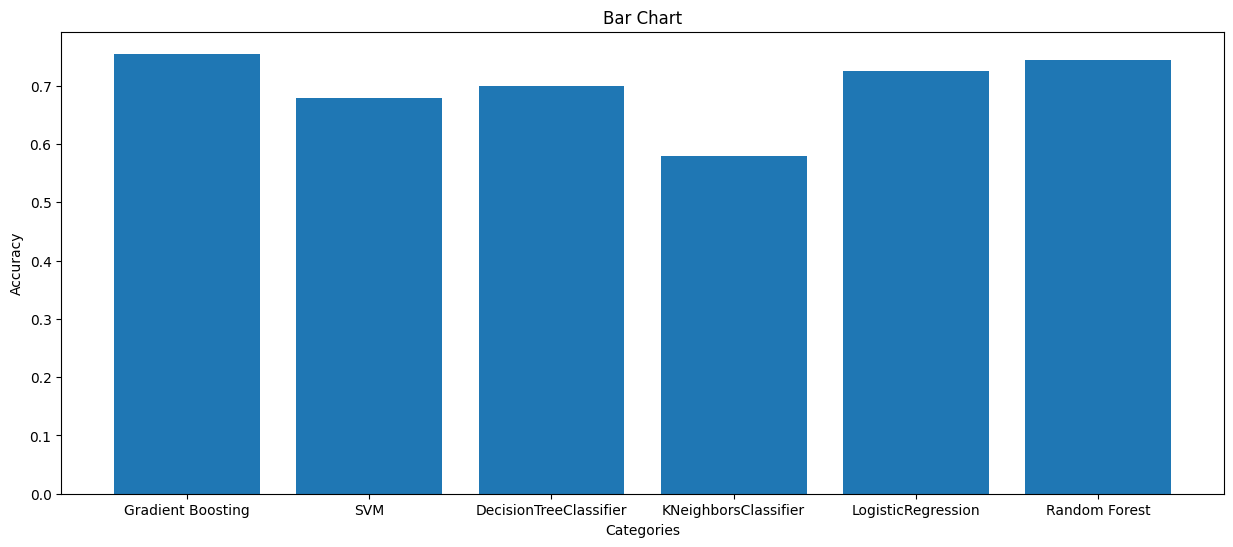

In [ ]:
data = [0.7548209366391184, 0.678374655647383, 0.70, 0.58,0.7252066115702479, 0.7444903581267218]
labels = ['Gradient Boosting', 'SVM', 'DecisionTreeClassifier', 'KNeighborsClassifier','LogisticRegression','Random Forest']  # You can use meaningful labels if available
plt.figure(figsize=(15, 6))
plt.bar(labels, data)
plt.xlabel('Categories')
plt.ylabel('Accuracy')
plt.title('Bar Chart')
plt.show()


# **Summary of your project**

<<< summary >>>